In [1]:
import numpy as np
%matplotlib inline

import all the things

In [2]:
import MDAnalysis
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

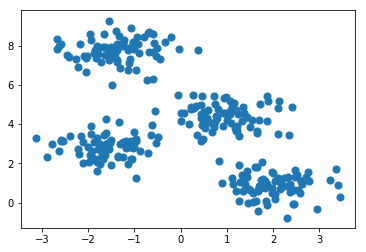

In [8]:
plt.scatter(X[:,0], X[:,1], s = 50)
plt.show()

In [9]:
matplotlib.__version__

'2.2.0'

In [10]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

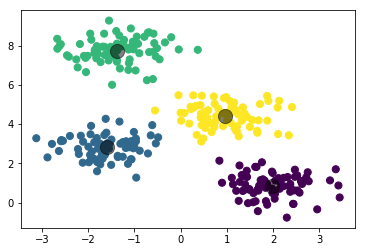

In [11]:
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 200, alpha = 0.5)
plt.show()

In [3]:
def dis (sel1, sel2, x) :
	res_i = x.select_atoms(sel1 + ' and name CA').positions
	res_j = x.select_atoms(sel2 + ' and name CA').positions
	dis = np.linalg.norm(res_i - res_j)
	return dis

In [10]:
up = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/USEFUL/structures/UP_correctpro.pdb')
up_pro = up.select_atoms('protein')

dn = MDAnalysis.Universe('/sansom/s150/pemb4066/Documents/PART_II/USEFUL/structures/DN_correctResid.pdb')
dn_pro = dn.select_atoms('protein')

In [14]:
Fen_A = []
Fen_B = []
Zip_A = []
Zip_B = []
Exp_A = []
Exp_B = []

for ts in u.trajectory:
	Fen_A.append(dis('resid 324 and segid A', 'resid 198 and segid B', protein))
	Fen_B.append(dis('resid 324 and segid B', 'resid 198 and segid A', protein))
	Zip_A.append(dis('resid 326 and segid A', 'resid 237 and segid A', protein))
	Zip_B.append(dis('resid 326 and segid B', 'resid 237 and segid B', protein))
	Exp_A.append(dis('resid 322 and segid A', 'resid 212 and segid A', protein))
	Exp_B.append(dis('resid 322 and segid B', 'resid 212 and segid B', protein))

/usr/lib/python2.7/dist-packages/numpy/lib/utils.py:99: DeprecationWarning: `coordinates` is deprecated!
This will be removed in version 0.16.0; use `positions` property instead
  warnings.warn(depdoc, DeprecationWarning)


In [11]:
FAup = []
FBup = []
ZAup = []
ZBup = []
EAup = []
EBup = []

FAup.append(dis('resid 324 and segid A', 'resid 198 and segid B', up_pro))
FBup.append(dis('resid 324 and segid B', 'resid 198 and segid A', up_pro))
ZAup.append(dis('resid 326 and segid A', 'resid 237 and segid A', up_pro))
ZBup.append(dis('resid 326 and segid B', 'resid 237 and segid B', up_pro))
EAup.append(dis('resid 322 and segid A', 'resid 212 and segid A', up_pro))
EBup.append(dis('resid 322 and segid B', 'resid 212 and segid B', up_pro))

In [12]:
FAdn = []
FBdn = []
ZAdn = []
ZBdn = []
EAdn = []
EBdn = []

FAdn.append(dis('resid 324 and segid A', 'resid 198 and segid B', dn_pro))
FBdn.append(dis('resid 324 and segid B', 'resid 198 and segid A', dn_pro))
ZAdn.append(dis('resid 326 and segid A', 'resid 237 and segid A', dn_pro))
ZBdn.append(dis('resid 326 and segid B', 'resid 237 and segid B', dn_pro))
EAdn.append(dis('resid 322 and segid A', 'resid 212 and segid A', dn_pro))
EBdn.append(dis('resid 322 and segid B', 'resid 212 and segid B', dn_pro))

In [17]:
FZ_a = np.stack((Zip_A, Fen_A), axis = -1)
FZ_b = np.stack((Zip_B, Fen_B), axis = -1)
FZ = np.concatenate((FZ_a, FZ_b), axis = 0)

In [18]:
k_means = KMeans(n_clusters = 2)
k_means.fit(FZ)
y_k_means = k_means.predict(FZ)

[3, 18, 3, 16]

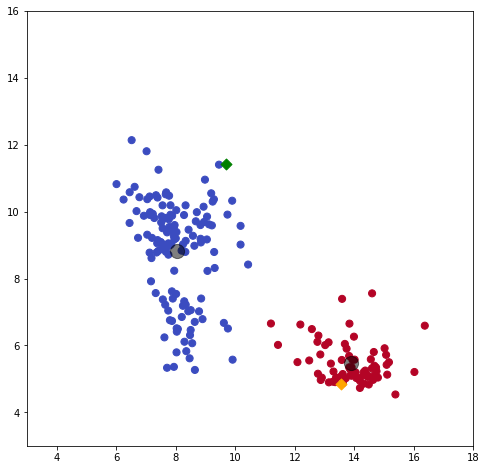

In [19]:
plt.figure(figsize = (8,8))
plt.scatter(FZ[:,0], FZ[:,1], c = y_k_means, s = 50, cmap = 'coolwarm')
center = k_means.cluster_centers_
plt.scatter(center[:,0], center[:,1], c = 'black', s = 200, alpha = 0.5)
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'orange', marker = 'D', s = 60)
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'green', marker = 'D', s = 60)
v = [3,18,3,16]
plt.axis(v)

In [37]:
def FZ_FE(A, B, C) :
        u = MDAnalysis.Universe(A, B)
        protein = u.select_atoms('protein')
        Fen_A = []
        Fen_B = []
        Zip_A = []
        Zip_B = []
        Exp_A = []
        Exp_B = []
        for ts in u.trajectory:
            Fen_A.append(dis('resid 324 and segid A', 'resid 198 and segid B', protein))
            Fen_B.append(dis('resid 324 and segid B', 'resid 198 and segid A', protein))
            Zip_A.append(dis('resid 326 and segid A', 'resid 237 and segid A', protein))
            Zip_B.append(dis('resid 326 and segid B', 'resid 237 and segid B', protein))
            Exp_A.append(dis('resid 322 and segid A', 'resid 212 and segid A', protein))
            Exp_B.append(dis('resid 322 and segid B', 'resid 212 and segid B', protein))
        FZ_a = np.stack((Zip_A, Fen_A), axis = 1)
        FZ_b = np.stack((Zip_B, Fen_B), axis = 1)
        C.append(np.concatenate((FZ_a, FZ_b), axis = 0))
        C = np.squeeze(C)
        return C

In [85]:
##### DFPC
### 1b

F1b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc', F1b1FZ)
F1b1FZ = np.squeeze(F1b1FZ)

F1b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/1bar/analysis/md-c.xtc', F1b2FZ)
F1b2FZ = np.squeeze(F1b2FZ)

### -30b

F30b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', F30b1FZ)
F30b1FZ = np.squeeze(F30b1FZ)

F30b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', F30b2FZ)
F30b2FZ = np.squeeze(F30b2FZ)

### -40b

F40b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', F40b1FZ)
F40b1FZ = np.squeeze(F40b1FZ)

F40b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', F40b2FZ)
F40b2FZ = np.squeeze(F40b2FZ)

F40b3FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', F40b3FZ)
F40b3FZ = np.squeeze(F40b3FZ)

##### DOPC
### 1b

O1b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/analysis/md-c.xtc', O1b1FZ)
O1b1FZ = np.squeeze(O1b1FZ)

O1b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', O1b2FZ)
O1b2FZ = np.squeeze(O1b2FZ)

### -30b

O30b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', O30b1FZ)
O30b1FZ = np.squeeze(O30b1FZ)

O30b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', O30b2FZ)
O30b2FZ = np.squeeze(O30b2FZ)

### -40b

O40b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', O40b1FZ)
O40b1FZ = np.squeeze(O40b1FZ)

O40b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', O40b2FZ)
O40b2FZ = np.squeeze(O40b2FZ)

O40b3FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', O40b3FZ)
O40b3FZ = np.squeeze(O40b3FZ)

### -50b

O50b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', O50b1FZ)
O50b1FZ = np.squeeze(O50b1FZ)

O50b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', O50b2FZ)
O50b2FZ = np.squeeze(O50b2FZ)

##### DVPC
### 1b

V1b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/analysis/md-c.xtc', V1b1FZ)
V1b1FZ = np.squeeze(V1b1FZ)

V1b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', V1b2FZ)
V1b2FZ = np.squeeze(V1b2FZ)

### -40b

V40b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', V40b1FZ)
V40b1FZ = np.squeeze(V40b1FZ)

V40b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', V40b2FZ)
V40b2FZ = np.squeeze(V40b2FZ)

V40b3FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', V40b3FZ)
V40b3FZ = np.squeeze(V40b3FZ)

### -50b

V50b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', V50b1FZ)
V50b1FZ = np.squeeze(V50b1FZ)

V50b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', V50b2FZ)
V50b2FZ = np.squeeze(V50b2FZ)

### -60b

V60b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc', V60b1FZ)
V60b1FZ = np.squeeze(V60b1FZ)

V60b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc', V60b2FZ)
V60b2FZ = np.squeeze(V60b2FZ)

##### POPC
### 1b

P1b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat1/analysis/md-c.xtc', P1b1FZ)
P1b1FZ = np.squeeze(P1b1FZ)

P1b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/1bar/repeat2/analysis/md-c.xtc', P1b2FZ)
P1b2FZ = np.squeeze(P1b2FZ)

### -40b

P50b1FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', P50b1FZ)
P50b1FZ = np.squeeze(P50b1FZ)

P50b2FZ = []
FZ_FE('/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '/sansom/s150/pemb4066/Documents/PART_II/TREK2/CG_T2/POPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', P50b2FZ)
P50b2FZ = np.squeeze(P50b2FZ)

In [91]:
FZ_tot = np.concatenate((F1b1FZ, F1b2FZ, F30b1FZ, F30b2FZ, F40b1FZ, F40b2FZ, F40b3FZ, O1b1FZ, O1b2FZ, O30b1FZ, O30b2FZ, O40b1FZ, O40b2FZ, O40b3FZ, O50b1FZ, O50b2FZ, V1b1FZ, V1b2FZ, V40b1FZ, V40b2FZ, V40b3FZ, V50b1FZ, V50b2FZ, V60b1FZ, V60b2FZ, P1b1FZ, P1b2FZ, P50b1FZ, P50b2FZ), axis = 0)

In [205]:
FZ_tot

array([[ 10.72733688,   9.89805412],
       [ 11.35582924,   9.69151306],
       [  9.12225056,   9.37971497],
       ..., 
       [  5.05158424,   6.82643795],
       [  4.99760818,   7.13600969],
       [  5.10110807,   6.62924242]], dtype=float32)

In [244]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(FZ_tot)
y_kmeans = kmeans.predict(FZ_tot)

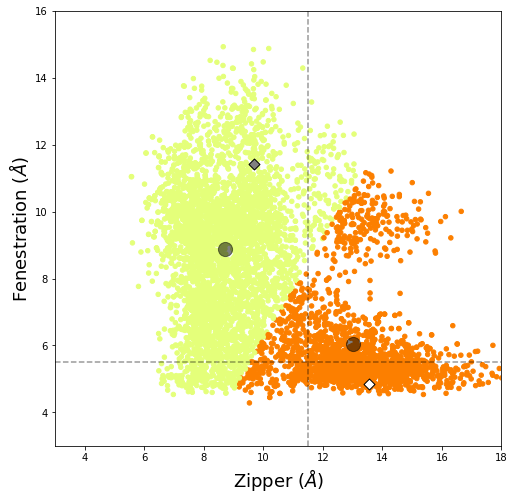

In [260]:
fig = plt.figure(figsize = (8,8))
plt.scatter(FZ_tot[:,0], FZ_tot[:,1], c = y_kmeans, s = 20, cmap = 'Wistia')
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'white', marker = 'D', s = 60, edgecolor = 'black')
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'grey', marker = 'D', s = 60, edgecolor = 'black')
center = kmeans.cluster_centers_
plt.scatter(center[:,0], center[:,1], c = 'black', s = 200, alpha = 0.5)
v = [3,18,3,16]
plt.axis(v)
plt.axhline(5.5, linestyle = '--', color = 'black', alpha = 0.4)
plt.axvline(11.5, linestyle = '--', color = 'black', alpha = 0.4)
plt.xlabel('Zipper ($\AA$)', fontsize = '18')
plt.ylabel('Fenestration ($\AA$)', fontsize = '18')
plt.savefig("clustering-fz-kmeans-2.png", format='png', dpi=300)
plt.savefig("clustering-fz-kmeans-2.svg", format='svg', dpi=300)

In [246]:
k_means = KMeans(n_clusters = 3)
k_means.fit(FZ_tot)
y_k_means = k_means.predict(FZ_tot)

[3, 18, 3, 16]

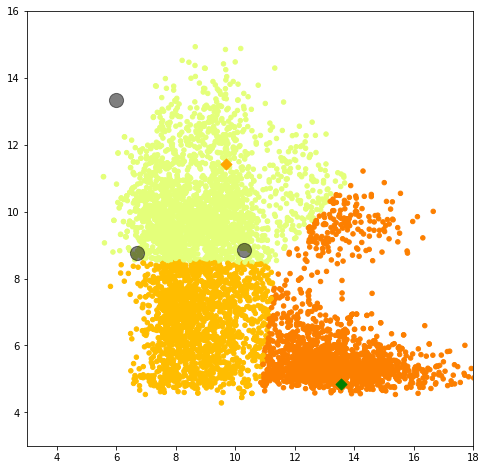

In [247]:
plt.figure(figsize = (8,8))
plt.scatter(FZ_tot[:,0], FZ_tot[:,1], c = y_k_means, s = 20, cmap = 'Wistia')
center = k_means.cluster_centers_
plt.scatter(center[:,1], center[:,0], c = 'black', s = 200, alpha = 0.5)
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'green', marker = 'D', s = 60)
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'orange', marker = 'D', s = 60)
v = [3,18,3,16]
plt.axis(v)

In [14]:
from sklearn.mixture import GaussianMixture as GMM

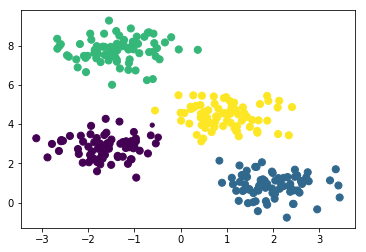

In [246]:
gmm = GMM(n_components=4).fit(X)
probs = gmm.predict_proba(X)
labels = gmm.predict(X)
size = 50*probs.max(1) ** 2
plt.scatter(X[:,0], X[:,1], c=labels, s=size, cmap = 'viridis')

[3, 18, 3, 16]

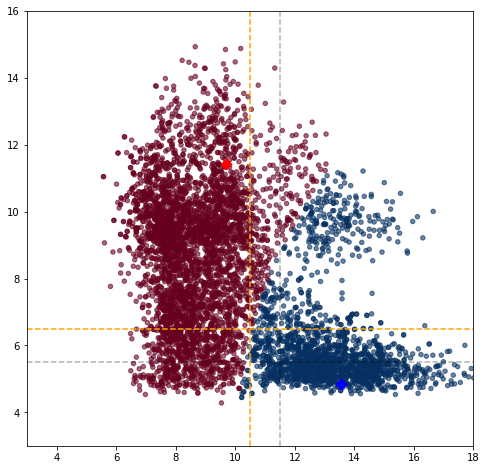

In [232]:
plt.figure(figsize = (8,8))
Gmm = GMM(n_components=2).fit(FZ_tot)
label = Gmm.predict(FZ_tot)
plt.scatter(FZ_tot[:,0], FZ_tot[:,1], c=label, s=20, cmap = 'RdBu', alpha = 0.6)
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'blue', marker = 'D', s = 60)
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'red', marker = 'D', s = 60)
plt.axhline(5.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axvline(11.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axhline(6.5, linestyle = '--', color = 'orange')
plt.axvline(10.5, linestyle = '--', color = 'orange')
v = [3,18,3,16]
plt.axis(v)

In [73]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    if covariance.shape == (2,2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
        width, height = 2 * np.sqrt(s)
    else :
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label = True, ax = None):
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha = w * w_factor, edgecolor = 'black', facecolor = 'yellow')

[3, 18, 3, 16]

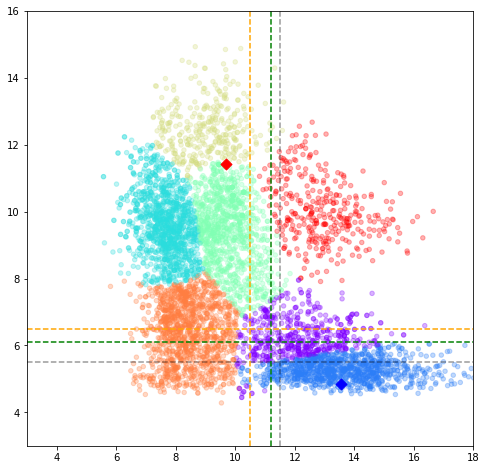

In [251]:
gmm = GMM(n_components = 7, covariance_type='full', n_init = 10)
labels = gmm.fit(FZ_tot).predict(FZ_tot)
plt.figure(figsize = (8,8))
#plot_gmm(gmm, FZ_tot)
plt.scatter(FZ_tot[:,0], FZ_tot[:,1], c=labels, s=20, cmap = 'rainbow', alpha = 0.3)
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'blue', marker = 'D', s = 60)
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'red', marker = 'D', s = 60)
plt.axhline(5.5, linestyle = '--', color = 'black', alpha = 0.4)
plt.axvline(11.5, linestyle = '--', color = 'black', alpha = 0.4)
plt.axhline(6.5, linestyle = '--', color = 'orange')
plt.axvline(10.5, linestyle = '--', color = 'orange')
plt.axhline(6.1, linestyle = '--', color = 'green')
plt.axvline(11.2, linestyle = '--', color = 'green')
v = [3,18,3,16]
plt.axis(v)

In [234]:
probs = gmm.predict_proba(FZ_tot)

In [235]:
probs

array([[9.97430002e-01, 2.56999809e-03],
       [9.99347445e-01, 6.52554510e-04],
       [9.90719140e-01, 9.28086045e-03],
       ...,
       [5.96134622e-04, 9.99403865e-01],
       [8.27341442e-07, 9.99999173e-01],
       [1.22220455e-03, 9.98777795e-01]])

In [96]:
probFZ = np.concatenate((FZ_tot, probs), axis = 1)

In [97]:
probFZ.shape

(5858, 4)

In [115]:
F1b1 = probFZ[0:202,:]
F1b2 = probFZ[202:404,:]
F30b1 = probFZ[404:606,:]
F30b2 = probFZ[606:808,:]
F40b1 = probFZ[808:1010,:]
F40b2 = probFZ[1010:1212,:]
F40b3 = probFZ[1212:1414,:]
O1b1 = probFZ[1414:1616,:]
O1b2 = probFZ[1616:1818,:]
O30b1 = probFZ[1818:2020,:]
O30b2 = probFZ[2020:2222,:]
O40b1 = probFZ[2222:2424,:]
O40b2 = probFZ[2424:2626,:]
O40b3 = probFZ[2626:2828,:]
O50b1 = probFZ[2828:3030,:]
O50b2 = probFZ[3030:3232,:]
V1b1 = probFZ[3232:3434,:]
V1b2 = probFZ[3434:3636,:]
V40b1 = probFZ[3636:3838,:]
V40b2 = probFZ[3838:4040,:]
V40b3 = probFZ[4040:4242,:]
V50b1 = probFZ[4242:4444,:]
V50b2 = probFZ[4444:4646,:]
V60b1 = probFZ[4646:4848,:]
V60b2 = probFZ[4848:5050,:]
P1b1 = probFZ[5050:5252,:]
P1b2 = probFZ[5252:5454,:]
P50b1 = probFZ[5454:5656,:]
P50b2 = probFZ[5656:,:]

In [112]:
test = 0

for i in F1b1[:,2]:
    if i > 0.5 :
        test = test + 1 

In [150]:
def counting(A):
    count = 0
    for i in A[:,3]:
        if i > 0.5:
            count = count + 1
    percent = (float(count)/202)*100
    return percent

In [189]:
percentages = ((counting(F1b1)), (counting(F1b2)), (counting(F30b1)), (counting(F30b2)), (counting(F40b1)), (counting(F40b2)), (counting(F40b3)), (counting(O1b1)), (counting(O1b2)), (counting(O30b1)), (counting(O30b2)), (counting(O40b1)), (counting(O40b2)), (counting(O40b3)), (counting(O50b1)), (counting(O50b2)), (counting(V1b1)), (counting(V1b2)), (counting(V40b1)), (counting(V40b2)), (counting(V40b3)), (counting(V50b1)), (counting(V50b2)), (counting(V60b1)), (counting(V60b2)), (counting(P1b1)), (counting(P1b2)), (counting(P50b1)), (counting(P50b2)))

In [186]:
percentages = ((counting(F1b1)), (counting(F1b2)), (counting(F30b1)), (counting(F30b2)), (counting(F40b1)), (counting(F40b2)), (counting(F40b3)), (counting(O1b1)), (counting(O1b2)), (counting(O30b1)))
indextest = np.arange(10)

In [191]:
labels = ('F1b1','F1b2','F30b1','F30b2','F40b1','F40b2','F40b3','O1b1','O1b2','O30b1','O30b2','O40b1','O40b2','O40b3','O50b1','O50b2','V1b1','V1b2','V40b1','V40b2','V40b3','V50b1','V50b2','V60b1','V60b2','P1b1','P1b2','P50b1', 'P50b2')

29

<BarContainer object of 29 artists>

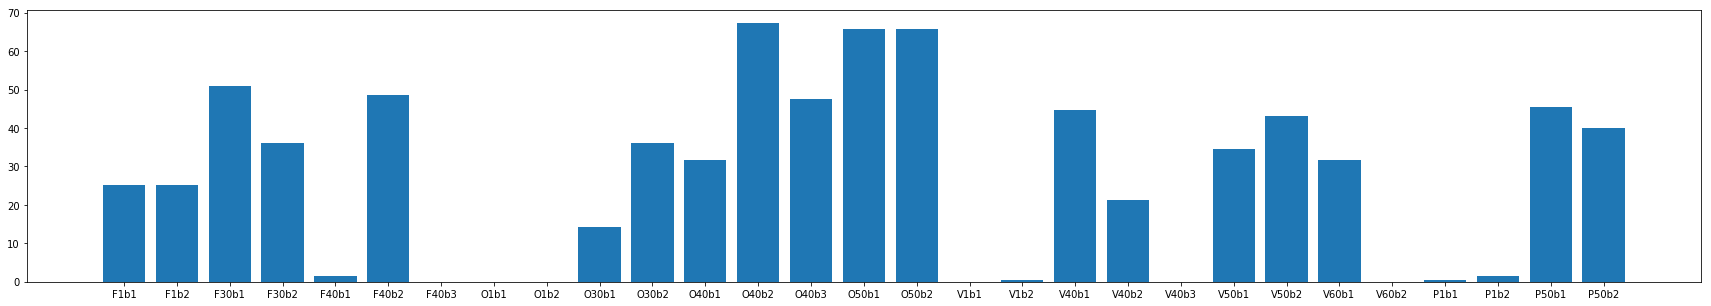

In [196]:
plt.figure(figsize = (30,5))
plt.bar(index, percentages, tick_label = labels)

In [206]:
F1b = (counting(F1b1)+counting(F1b2))/2
F30b = (counting(F30b1)+counting(F30b2))/2
F40b = (counting(F40b1)+counting(F40b2)+counting(F40b3))/3
O1b = (counting(O1b1)+counting(O1b2))/2
O30b = (counting(O30b1)+counting(O30b2))/2
O40b = (counting(O40b1)+counting(O40b2)+counting(O40b3))/3
O50b = (counting(O50b1)+counting(O50b2))/2
V1b = (counting(V1b1)+counting(V1b2))/2
V40b = (counting(V40b1)+counting(V40b2)+counting(V40b3))/3
V50b = (counting(V50b1)+counting(V50b2))/2
V60b = (counting(V60b1)+counting(V60b2))/2
P1b = (counting(P1b1)+counting(P1b2))/2
P50b = (counting(P50b1)+counting(P50b2))/2

In [223]:
F1bh = (counting_harsh(F1b1)+counting_harsh(F1b2))/2
F30bh = (counting_harsh(F30b1)+counting_harsh(F30b2))/2
F40bh = (counting_harsh(F40b1)+counting_harsh(F40b2)+counting_harsh(F40b3))/3
O1bh = (counting_harsh(O1b1)+counting_harsh(O1b2))/2
O30bh = (counting_harsh(O30b1)+counting_harsh(O30b2))/2
O40bh = (counting_harsh(O40b1)+counting_harsh(O40b2)+counting_harsh(O40b3))/3
O50bh = (counting_harsh(O50b1)+counting_harsh(O50b2))/2
V1bh = (counting_harsh(V1b1)+counting_harsh(V1b2))/2
V40bh = (counting_harsh(V40b1)+counting_harsh(V40b2)+counting_harsh(V40b3))/3
V50bh = (counting_harsh(V50b1)+counting_harsh(V50b2))/2
V60bh = (counting_harsh(V60b1)+counting_harsh(V60b2))/2
P1bh = (counting_harsh(P1b1)+counting_harsh(P1b2))/2
P50bh = (counting_harsh(P50b1)+counting_harsh(P50b2))/2

In [224]:
F1bd = F1b - F1bh
F30bd = F30b - F30bh
F40bd = F40b - F40bh
O1bd = O1b - O1bh
O30bd = O30b - O30bh
O40bd = O40b - O40bh
O50bd = O50b - O50bh
V1bd = V1b - V1bh
V40bd = V40b - V40bh
V50bd = V50b - V50bh
V60bd = V60b - V60bh
P1bd = P1b - P1bh
P50bd = P50b - P50bh

In [225]:
percents = (F1bh, F30bh, F40bh, O1bh, O30bh, O40bh, O50bh, V1bh, V40bh, V50bh, V60bh, P1bh, P50bh)
percents_dff = (F1bd, F30bd, F40bd, O1bd, O30bd, O40bd, O50bd, V1bd, V40bd, V50bd, V60bd, P1bd, P50bd)
indexy = np.arange(13)
labelling = ('F1b', 'F30b', 'F40b', 'O1b', 'O30b', 'O40b', 'O50b', 'V1b', 'V40b', 'V50b', 'V60b', 'P1b', 'P50b')

Text(0,0.5,'Percentage of time in Up state')

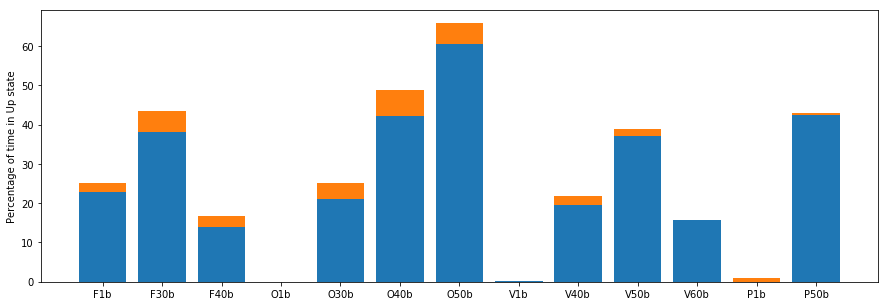

In [227]:
plt.figure(figsize = (15,5))
plt.bar(indexy, percents, tick_label = labelling)
plt.bar(indexy, percents_dff, bottom = percents)
plt.ylabel('Percentage of time in Up state')

In [212]:
def counting_harsh(A):
    count = 0
    for i in A[:,3]:
        if i > 0.9:
            count = count + 1
    percent = (float(count)/202)*100
    return percent

In [213]:
percentages_harsh = ((counting_harsh(F1b1)), (counting_harsh(F1b2)), (counting_harsh(F30b1)), (counting_harsh(F30b2)), (counting_harsh(F40b1)), (counting_harsh(F40b2)), (counting_harsh(F40b3)), (counting_harsh(O1b1)), (counting_harsh(O1b2)), (counting_harsh(O30b1)), (counting_harsh(O30b2)), (counting_harsh(O40b1)), (counting_harsh(O40b2)), (counting_harsh(O40b3)), (counting_harsh(O50b1)), (counting_harsh(O50b2)), (counting_harsh(V1b1)), (counting_harsh(V1b2)), (counting_harsh(V40b1)), (counting_harsh(V40b2)), (counting_harsh(V40b3)), (counting_harsh(V50b1)), (counting_harsh(V50b2)), (counting_harsh(V60b1)), (counting_harsh(V60b2)), (counting_harsh(P1b1)), (counting_harsh(P1b2)), (counting_harsh(P50b1)), (counting_harsh(P50b2)))

<BarContainer object of 29 artists>

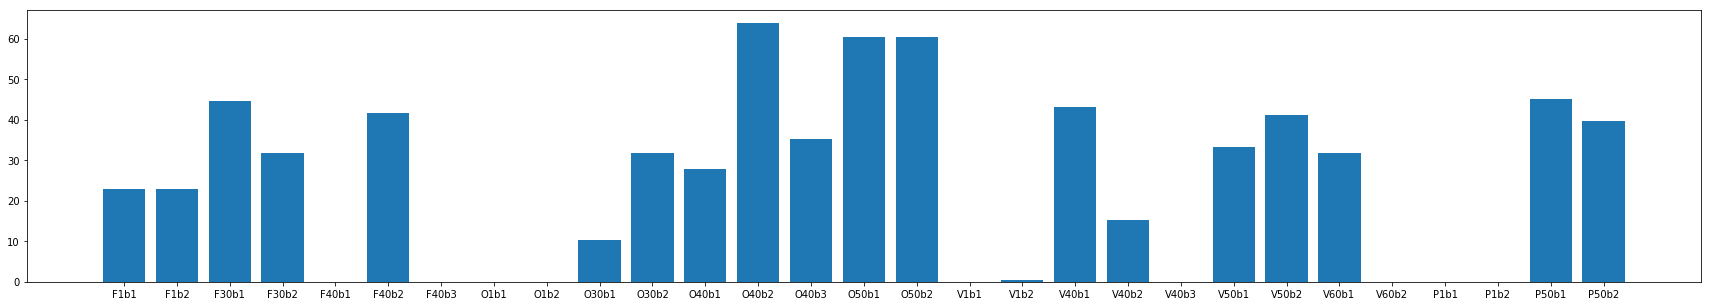

In [214]:
plt.figure(figsize = (30,5))
plt.bar(index, percentages_harsh, tick_label = labels)

In [218]:
percentages_diff = ((counting(F1b1) - counting_harsh(F1b1)), (counting(F1b2) - counting_harsh(F1b2)), (counting(F30b1) - counting_harsh(F30b1)), (counting(F30b2) - counting_harsh(F30b2)), (counting(F40b1) - counting_harsh(F40b1)), (counting(F40b2) - counting_harsh(F40b2)), (counting(F40b3) - counting_harsh(F40b3)), (counting(O1b1) - counting_harsh(O1b1)), (counting(O1b2) - counting_harsh(O1b2)), (counting(O30b1) - counting_harsh(O30b1)), (counting(O30b2) - counting_harsh(O30b2)), (counting(O40b1) - counting_harsh(O40b1)), (counting(O40b2) - counting_harsh(O40b2)), (counting(O40b3) - counting_harsh(O40b3)), (counting(O50b1) - counting_harsh(O50b1)), (counting(O50b2) - counting_harsh(O50b2)), (counting(V1b1) - counting_harsh(V1b1)), (counting(V1b2) - counting_harsh(V1b2)), (counting(V40b1) - counting_harsh(V40b1)), (counting(V40b2) - counting_harsh(V40b2)), (counting(V40b3) - counting_harsh(V40b3)), (counting(V50b1) - counting_harsh(V50b1)), (counting(V50b2) - counting_harsh(V50b2)), (counting(V60b1) - counting_harsh(V60b1)), (counting(V60b2) - counting_harsh(V60b2)), (counting(P1b1) - counting_harsh(P1b1)), (counting(P1b2) - counting_harsh(P1b2)), (counting(P50b1) - counting_harsh(P50b1)), (counting(P50b2) - counting_harsh(P50b2)))

Text(0,0.5,'Percentage of simulation time in Up state')

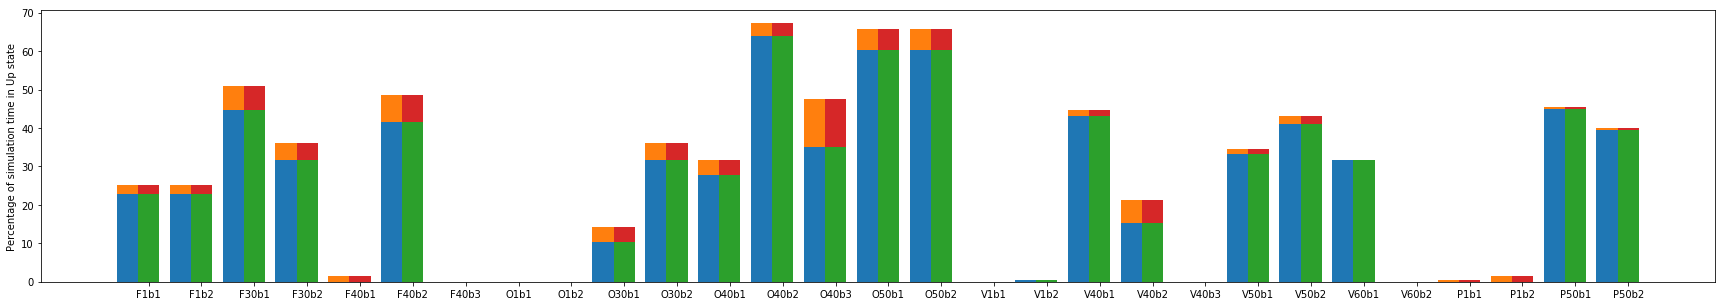

In [228]:
width = 0.4
plt.figure(figsize = (30,5))
plt.bar(index - width/2, percentages_harsh, width, tick_label = labels)
plt.bar(index - width/2, percentages_diff, width, bottom = percentages_harsh)
plt.bar(index + width/2, percentages_harsh, width, tick_label = labels)
plt.bar(index + width/2, percentages_diff, width, bottom = percentages_harsh)
plt.ylabel('Percentage of simulation time in Up state')

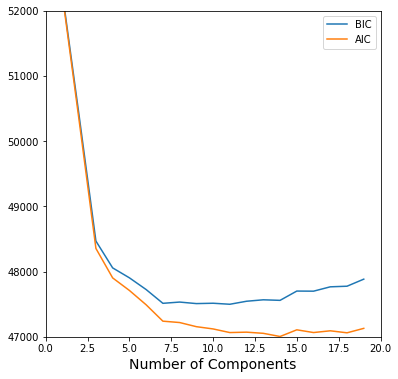

In [256]:
plt.figure(figsize=(6,6))
n_components = np.arange(1,20)
models = [GMM(n).fit(FZ_tot)
         for n in n_components]

plt.plot(n_components, [m.bic(FZ_tot) for m in models], label='BIC')
plt.plot(n_components, [m.aic(FZ_tot) for m in models], label='AIC')
plt.legend(loc='best', fontsize = 'medium')
plt.xlabel('Number of Components', fontsize = 14)
s = [0,20,47000,52000]
plt.axis(s)
plt.savefig("fz-aicbic.png", format='png', dpi=300)
plt.savefig("fz-aicbic.svg", format='svg', dpi=300)

[3, 18, 3, 16]

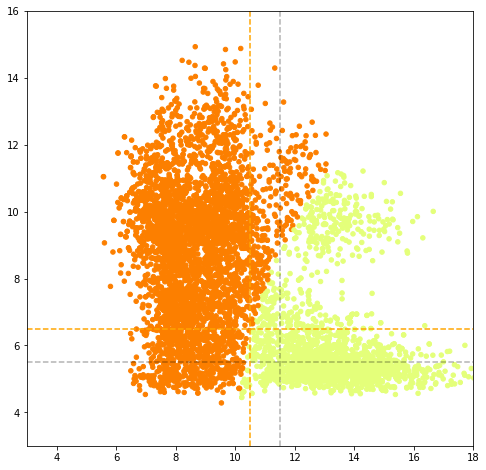

In [248]:
plt.figure(figsize = (8,8))
gMm = GMM(n_components=2).fit(FZ_tot)
LabeL = gMm.predict(FZ_tot)
plt.scatter(FZ_tot[:,0], FZ_tot[:,1], c=LabeL, s=20, cmap = 'Wistia')
#plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'green', marker = 'D', s = 60)
#plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'blue', marker = 'D', s = 60)
plt.axhline(5.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axvline(11.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axhline(6.5, linestyle = '--', color = 'orange')
plt.axvline(10.5, linestyle = '--', color = 'orange')
v = [3,18,3,16]
plt.axis(v)

[3, 18, 3, 16]

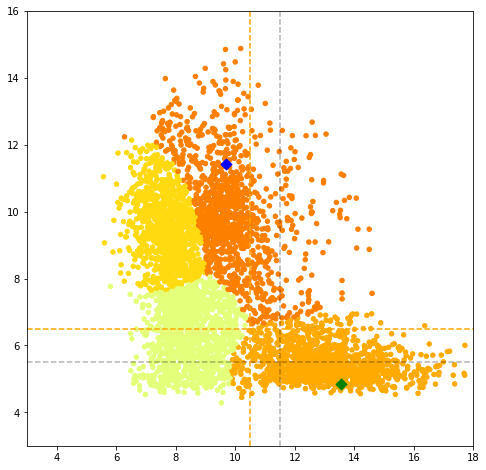

In [282]:
plt.figure(figsize = (8,8))
gMm = GMM(n_components=4).fit(FZ_tot)
LabeL = gMm.predict(FZ_tot)
plt.scatter(FZ_tot[:,1], FZ_tot[:,0], c=LabeL, s=20, cmap = 'Wistia')
plt.scatter(ZAup, FAup, label = '4BW5 (Up)', color = 'green', marker = 'D', s = 60)
plt.scatter(ZAdn, FAdn, label = '4XDJ (Down)', color = 'blue', marker = 'D', s = 60)
plt.axhline(5.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axvline(11.5, linestyle = '--', color = 'black', alpha = 0.3)
plt.axhline(6.5, linestyle = '--', color = 'orange')
plt.axvline(10.5, linestyle = '--', color = 'orange')
v = [3,18,3,16]
plt.axis(v)